# Fetch Historical Data

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch the data for the three assets
assets = ['TSLA', 'BND', 'SPY']
data = yf.download(assets, start='2015-01-01', end='2024-10-31')

# Display the first few rows of the data to verify it's fetched correctly
print(data.head())


[*********************100%***********************]  3 of 3 completed

Price                      Adj Close                             Close  \
Ticker                           BND         SPY       TSLA        BND   
Date                                                                     
2015-01-02 00:00:00+00:00  63.358757  173.173767  14.620667  82.650002   
2015-01-05 00:00:00+00:00  63.542732  170.046341  14.006000  82.889999   
2015-01-06 00:00:00+00:00  63.726746  168.444595  14.085333  83.129997   
2015-01-07 00:00:00+00:00  63.765053  170.543671  14.063333  83.180000   
2015-01-08 00:00:00+00:00  63.665424  173.569962  14.041333  83.050003   

Price                                                  High              \
Ticker                            SPY       TSLA        BND         SPY   
Date                                                                      
2015-01-02 00:00:00+00:00  205.429993  14.620667  82.690002  206.880005   
2015-01-05 00:00:00+00:00  201.720001  14.006000  82.919998  204.369995   
2015-01-06 00:00:00+00:00  199.8

# Basic Data Cleaning and Exploration

In [4]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values by forward filling (if any)
data.fillna(method='ffill', inplace=True)

# Display basic statistics for each asset
print(data.describe())


Price      Ticker
Adj Close  BND       0
           SPY       0
           TSLA      0
Close      BND       0
           SPY       0
           TSLA      0
High       BND       0
           SPY       0
           TSLA      0
Low        BND       0
           SPY       0
           TSLA      0
Open       BND       0
           SPY       0
           TSLA      0
Volume     BND       0
           SPY       0
           TSLA      0
dtype: int64
Price     Adj Close                                  Close               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean      70.089252   310.253153   111.438965    80.316039   330.623634   
std        4.889918   111.250657   110.120450     5.097592   103.324179   
min       62.637581   157.328598     9.578000    68.040001   182.860001   
25%       66.314077   214.822353    17.066167    76.379997   242.130001   
50%       68.888947   275.8123

C:\Users\wubeshet.abera\AppData\Local\Temp\ipykernel_17544\1183644959.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


# Visualize Closing Prices Over Time

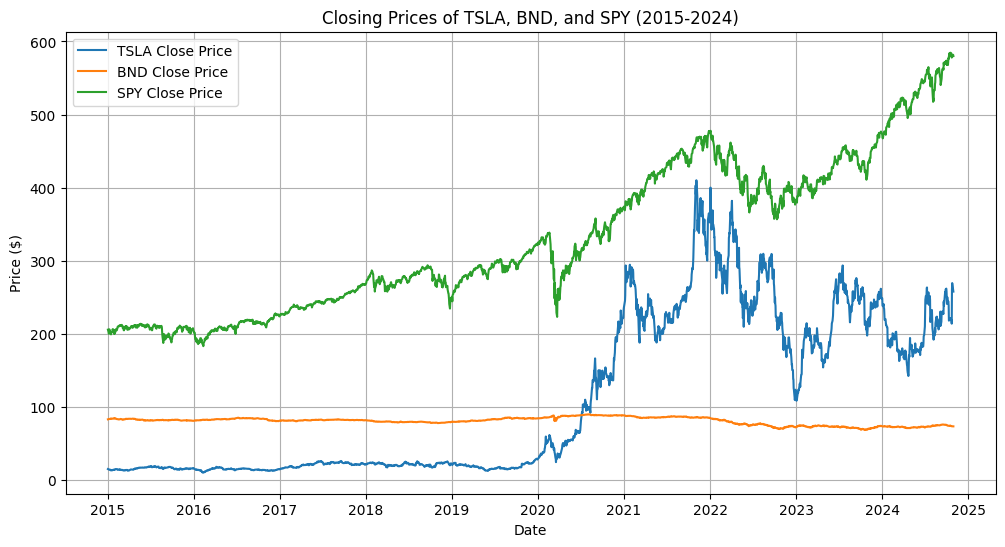

In [5]:
# Plot the closing prices of each asset
plt.figure(figsize=(12, 6))
for asset in assets:
    plt.plot(data['Close'][asset], label=f'{asset} Close Price')

plt.title('Closing Prices of TSLA, BND, and SPY (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


# Exploratory Data Analysis (EDA):

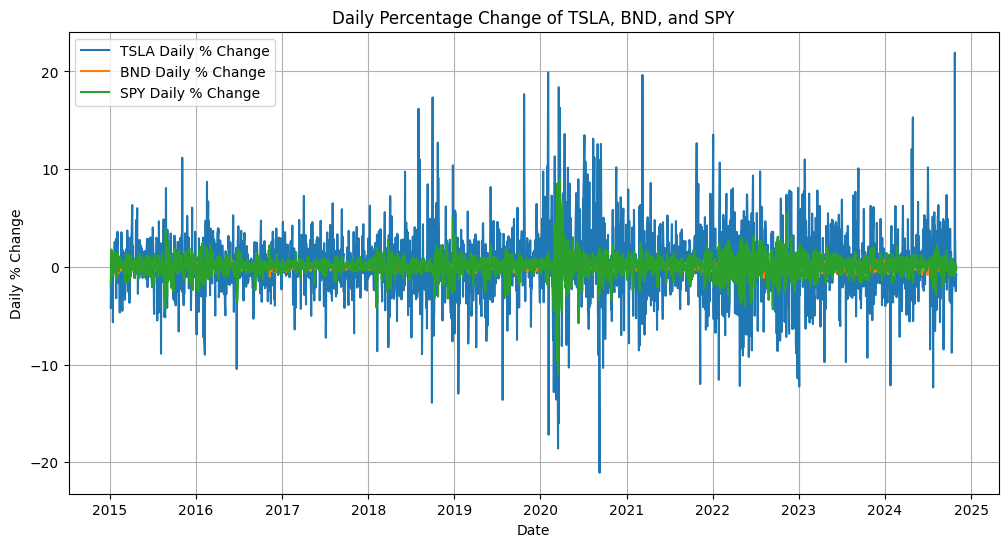

In [6]:
# Calculate daily percentage change
daily_pct_change = data['Close'].pct_change() * 100

# Plot the daily percentage change
plt.figure(figsize=(12, 6))
for asset in assets:
    plt.plot(daily_pct_change[asset], label=f'{asset} Daily % Change')

plt.title('Daily Percentage Change of TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.legend()
plt.grid(True)
plt.show()


# Analyzing Volatility

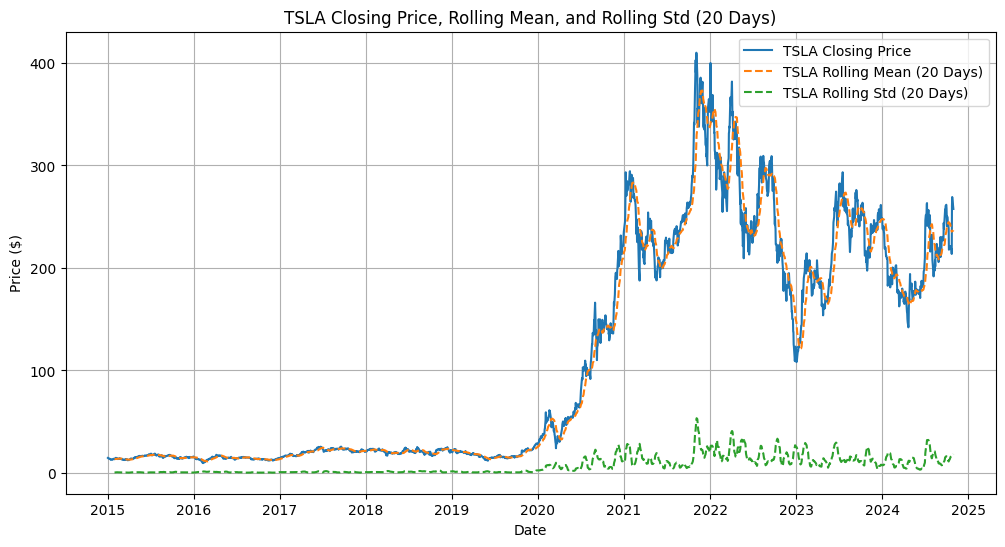

In [7]:
# Calculate rolling mean and standard deviation (20 days window)
rolling_mean = data['Close'].rolling(window=20).mean()
rolling_std = data['Close'].rolling(window=20).std()

# Plot rolling mean and standard deviation for TSLA as an example
plt.figure(figsize=(12, 6))
plt.plot(data['Close']['TSLA'], label='TSLA Closing Price')
plt.plot(rolling_mean['TSLA'], label='TSLA Rolling Mean (20 Days)', linestyle='--')
plt.plot(rolling_std['TSLA'], label='TSLA Rolling Std (20 Days)', linestyle='--')
plt.title('TSLA Closing Price, Rolling Mean, and Rolling Std (20 Days)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


# Outlier Detection

In [8]:
# Calculate the z-scores for daily percentage changes
z_scores = (daily_pct_change - daily_pct_change.mean()) / daily_pct_change.std()

# Identify days where z-score is greater than 3 or less than -3 (outliers)
outliers = z_scores[abs(z_scores) > 3]
print("Outliers detected (Days with unusually high or low returns):")
print(outliers)


Outliers detected (Days with unusually high or low returns):
Ticker                     BND  SPY      TSLA
Date                                         
2015-01-02 00:00:00+00:00  NaN  NaN       NaN
2015-01-05 00:00:00+00:00  NaN  NaN       NaN
2015-01-06 00:00:00+00:00  NaN  NaN       NaN
2015-01-07 00:00:00+00:00  NaN  NaN       NaN
2015-01-08 00:00:00+00:00  NaN  NaN       NaN
...                        ...  ...       ...
2024-10-24 00:00:00+00:00  NaN  NaN  6.072009
2024-10-25 00:00:00+00:00  NaN  NaN       NaN
2024-10-28 00:00:00+00:00  NaN  NaN       NaN
2024-10-29 00:00:00+00:00  NaN  NaN       NaN
2024-10-30 00:00:00+00:00  NaN  NaN       NaN

[2474 rows x 3 columns]


# Decomposing the Time Series:

<Figure size 1200x800 with 0 Axes>

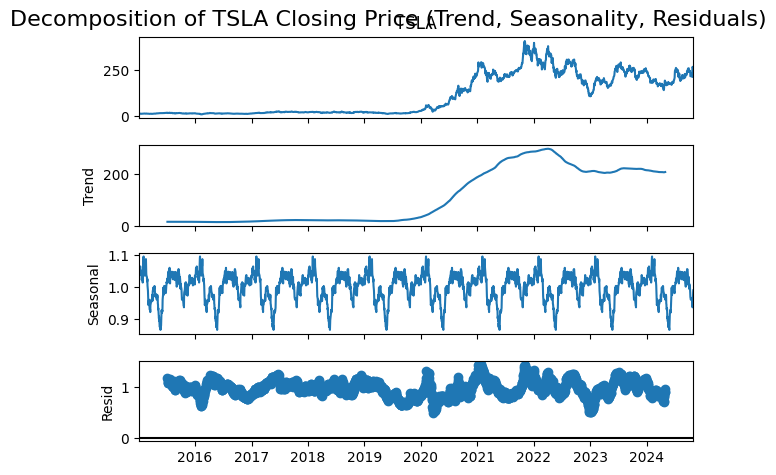

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose TSLA's closing price (using multiplicative model)
decomposition = seasonal_decompose(data['Close']['TSLA'].dropna(), model='multiplicative', period=252)

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Decomposition of TSLA Closing Price (Trend, Seasonality, Residuals)', fontsize=16)
plt.show()
